# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-13 (Stand: Mai 2024)

[Raum F1-09](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Interferenz

Tin Vrkic E-Mail: uyvpq@studen.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Mika Noch E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Shuran Liu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 27.06.2024

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/README.md).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kafe2
from uncertainties import ufloat, unumpy as unp
import pathlib

In [18]:
# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[], add_error=True, which=["x","y"]):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    if add_error:
        fit.add_error(axis = 'x', err_val = xy_error[0])
        fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

def weighted_mean_gauss(arr):
    res = np.sum( unp.nominal_values(arr) / unp.std_devs(arr) ) / np.sum( 1 / unp.std_devs(arr) )
    return res

def std_weighted_mean_gauss(arr):
    N = unp.nominal_values(arr).size
    arr_bar = weighted_mean_gauss(arr)
    return np.sqrt( (N/(N-1)) * np.sum( (unp.nominal_values(arr)-arr_bar)**2 / unp.std_devs(arr) ) / np.sum( 1/unp.std_devs(arr) ) )

## Aufgabe 1: Newtonsche Ringe

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie den Brechungsindex von Wasser, sowie den Brechungsindex der verwendeten Linse durch die Beobachtung von Newtonschen Ringen.
 * Bearbeiten Sie hierzu die folgenden Aufgaben.
 
---

### Aufgabe 1.1 Krümmungsradius $R$ einer ausgewählten Linse

Bestimmen Sie den Krümmungsradius $R$ einer symmetrischen, sphärischen, plankonvexen Linse aus der Beobachtung der Newtonschen Ringe unter dem Mikroskop.

---

In dieser Aufgabe wurden durch das Objektiv eines Mikroskops die Newton'schen Ringe in Reflexion bei Bestrahlung einer Linse mit Krümmungsradius $R$ mit gelbem und blauem Licht und Luft als Zwischenmedium und bei Bestrahlung mit gelbem Licht und Wasser als Zwischenmedium beobachtet und die Durchmesser der ersten paar gut messbaren dunklen Ringe gemessen. Aus diesen Durchmessern bzw. Radien lässt sich der Krümmungsradius der Linse durch Anpassung folgendes Modells an die Messwerte bestimmen:
$$d_k=2\sqrt{kR\lambda}+C$$
Das Licht der gelben LED hat eine Wellenlänge von $\lambda_{gelb}=590\,nm$, das der blauen LED $\lambda_{blau}=465\,nm$

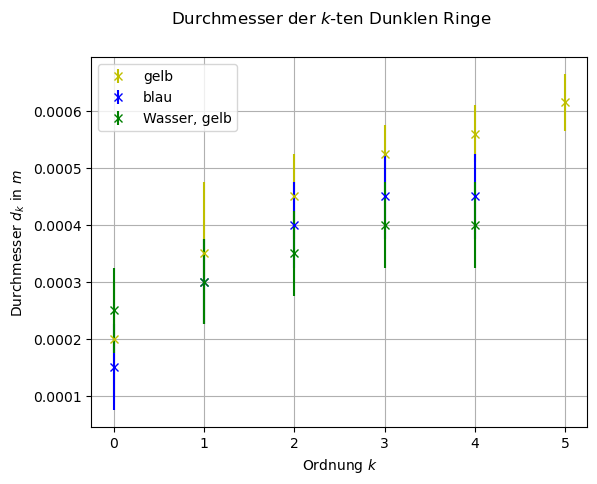

In [3]:
radien_newton_gelb = unp.uarray([ 23.4-23.0 , 23.5-22.8 , 23.6-22.7 , 23.7-22.65 , 23.72-22.6, 23.73-22.5 ] , [0.2 , 0.25 , 0.15, 0.1 , 0.1 , 0.1]) * 10**(-3) / 2  #meter
radien_newton_blau = unp.uarray([ 22.2-21.9 , 22.3-21.7 , 22.3-21.5 , 22.3-21.4 , 22.4-21.5 ] , [ 0.15 ]) * 10**(-3)/ 2  #meter
radien_newton_wasser = unp.uarray([ 23.0-22.5 , 23.1-22.5 , 23.1-22.4 , 23.2-22.4 , 23.2-22.4] , [ 0.15 ]) * 10**(-3)/ 2  #meter , mit gelbem Licht
k = np.arange(0,6)
lbda_gelb = 590 * 10**(-9) # Meter
lbda_blau = 465 * 10**(-9) # Meter

fig0, ax0 = plt.subplots()
ax0.errorbar(np.arange(unp.nominal_values(radien_newton_gelb).size) , unp.nominal_values(radien_newton_gelb), yerr=unp.std_devs(radien_newton_gelb),  fmt="yx", label="gelb")
ax0.errorbar(np.arange(unp.nominal_values(radien_newton_blau).size) , unp.nominal_values(radien_newton_blau), yerr=unp.std_devs(radien_newton_blau),  fmt="bx", label="blau")
ax0.errorbar(np.arange(unp.nominal_values(radien_newton_wasser).size) , unp.nominal_values(radien_newton_wasser), yerr=unp.std_devs(radien_newton_wasser),  fmt="gx", label="Wasser, gelb")
ax0.grid(), ax0.legend()

fig0.suptitle("Durchmesser der $k$-ten Dunklen Ringe")
ax0.set(xlabel="Ordnung $k$", ylabel="Durchmesser $d_k$ in $m$")
plt.show()

C:\Users\probz\AppData\Local\Temp\ipykernel_2544\1096968037.py:3: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_gelb) + c1
C:\Users\probz\AppData\Local\Temp\ipykernel_2544\1096968037.py:5: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_blau) + c2
C:\Users\probz\AppData\Local\Temp\ipykernel_2544\1096968037.py:3: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_gelb) + c1
C:\Users\probz\AppData\Local\Temp\ipykernel_2544\1096968037.py:5: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_blau) + c2


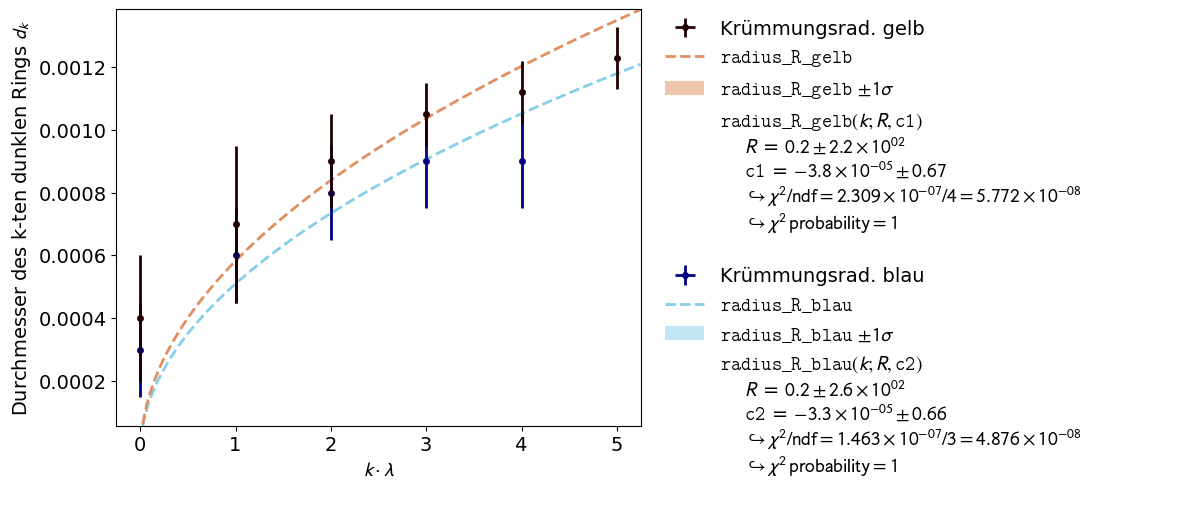

In [13]:
# Modell Funktion, k_lbda ist Ordnung * Wellenlänge des genutzten Lichts
def radius_R_gelb(k, R=.2, c1=-10**(-5)):
    return 2 * np.sqrt(k * R * lbda_gelb) + c1
def radius_R_blau(k, R=.2, c2=-10**(-5)):
    return 2 * np.sqrt(k * R * lbda_blau) + c2

data_gelb = kafe2.XYContainer( k[:unp.nominal_values(radien_newton_gelb).size], unp.nominal_values(2*radien_newton_gelb) )
data_blau = kafe2.XYContainer( k[:unp.nominal_values(radien_newton_blau).size], unp.nominal_values(2*radien_newton_blau) )
data_wasser = kafe2.XYContainer( k[:unp.nominal_values(radien_newton_wasser).size], unp.nominal_values(2*radien_newton_wasser) )

data_gelb.label = "Krümmungsrad. gelb" # Title
data_blau.label = "Krümmungsrad. blau" # Title

fit_gelb = kafe2.XYFit(xy_data = data_gelb, model_function = radius_R_gelb)
fit_blau = kafe2.XYFit(xy_data = data_blau, model_function = radius_R_blau)

fit_gelb.add_error(axis="y" , err_val=unp.std_devs(2*radien_newton_gelb))
fit_blau.add_error(axis="y" , err_val=unp.std_devs(2*radien_newton_blau))

fit_gelb.do_fit()
fit_blau.do_fit()

plot1 = kafe2.Plot([fit_gelb, fit_blau])
plot1.x_label , plot1.y_label = "$k\cdot \lambda$" , "Durchmesser des k-ten dunklen Rings $d_k$"
plot1.plot()
plot1.show()

Wir haben überhaupt keine Ahnung, warum die Fits nicht konvergieren. Die Werte haben eigentlich schon ein relativ Wurzelhaftes Verhalten, was man auch daran sieht, dass sich das Modell ziemlich gut and die Daten anpasst, allerdings sprechen eine $\chi^2$ probability von jeweils $1$ und jeweils eine Unsicherheit von $3$ (!!!) Größenordnungen größer als der bestimmte Krümmungsradius selbst dagegen. Der Wert für den Krümmungsradius, der bestimmt wurde, ist aber tatsächlich gar nicht so schlecht. Zur Übersicht im folgenden nochmal die Ergebnisse aufgelistet:  
Mit gelbem Licht  
- $R=(0.2\pm2.2\cdot 10^{2})\,m$  
- $c_1=(-3.8\cdot10^{-5}\pm0.67)\,m$  
- $\chi^2 \mathrm{\ probability}=1$  

Mit blauem Licht  
- $R=(0.2\pm2.6\cdot 10^{2})\,m$  
- $c_1=(-3.3\cdot10^{-5}\pm0.66)\,m$  
- $\chi^2 \mathrm{\ probability}=1$  

Da wir nichts besseres haben, müssen wir mit diesem Krümmungsradius in der 1.2 und 1.3 weiterrechnen. Wir können aber zumindest den Mittelwert der beiden bilden, dann reduziert sich zumindest die Unsicherheit etwas, bleibt aber in der selben Größenordnung.

### Aufgabe 1.2 Brechungsindex $n(\mathrm{H_{2}O})$ von Wasser

Bestimmen Sie den Brechungsindex $n(\mathrm{H_{2}O})$ von Wasser aus den veränderten Durchmessern der Newtonschen Ringe, wenn sich zwischen Linse und Objektträger Wasser statt Luft befindet.

---

Der Brechungsindex $n_W$ von Wasser lässt sich, leicht modifiziert, mit der selben Formel wir in 1.1 bestimmen. Dazu muss man beachten, dass Licht im Medium einen längeren Weg zurücklegt als im Vakuum, da sich die Lichtgeschwindigkeit im Medium ändert. Folgende Ersetzung wird dann notwendig: $\lambda \rightarrow \frac{\lambda}{n_W}$. Die Formel wird dann zu
$$d_k=2\sqrt{kR\frac{\lambda}{n_W}}+C$$

C:\Users\probz\AppData\Local\Temp\ipykernel_2544\1508649155.py:7: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_gelb / nW) + c3
C:\Users\probz\AppData\Local\Temp\ipykernel_2544\1508649155.py:7: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(k * R * lbda_gelb / nW) + c3


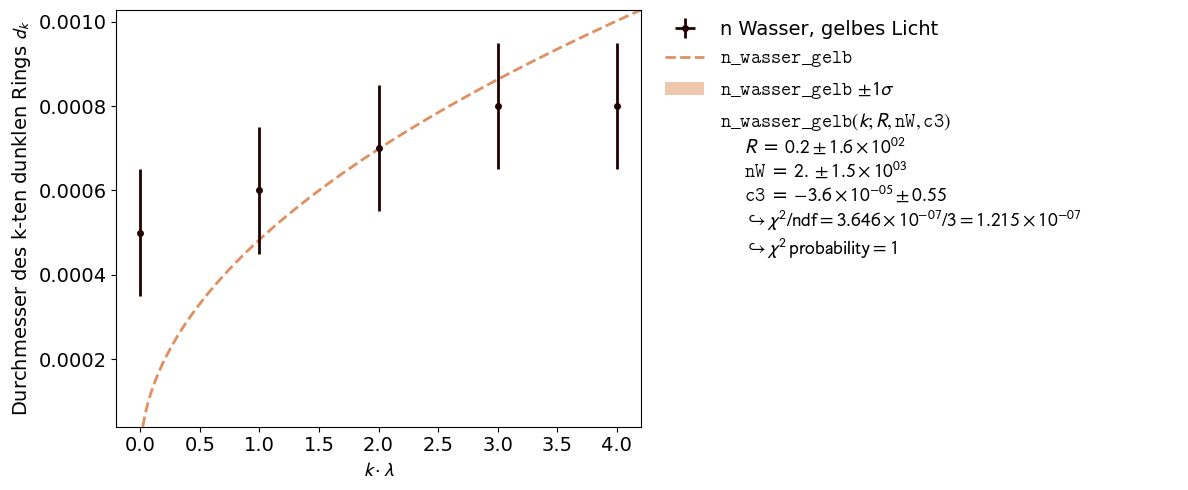

0.20000+/-170.29386


In [17]:
kr_rad1 = ufloat(0.2, 2.2 * 10**(2))
kr_rad2 = ufloat(0.2, 2.6 * 10**(2))
kr_rad = (kr_rad1+kr_rad2)/2

# Modell Funktion, 
def n_wasser_gelb(k, R=.2, nW=1.33, c3=-10**(-5)):
    return 2 * np.sqrt(k * R * lbda_gelb / nW) + c3

data_wasser = kafe2.XYContainer( k[:unp.nominal_values(radien_newton_wasser).size], unp.nominal_values(2*radien_newton_wasser) )

data_wasser.label = "n Wasser, gelbes Licht" # Title

fit_wasser = kafe2.XYFit(xy_data = data_wasser, model_function = n_wasser_gelb)

fit_wasser.add_error(axis="y" , err_val=unp.std_devs(2*radien_newton_wasser))
fit_wasser.add_parameter_constraint(name = "R", value = unp.nominal_values(kr_rad), uncertainty = unp.std_devs(kr_rad))

fit_wasser.do_fit()

plot2 = kafe2.Plot(fit_wasser)
plot2.x_label , plot2.y_label = "$k\cdot \lambda$" , "Durchmesser des k-ten dunklen Rings $d_k$"
plot2.plot()
plot2.show()
print(f"{kr_rad:.5f}")


Das Problem setzt sich fort, wir wissen immer noch nicht, warum das so ist. Es kann kaum sein, dass wir so extrem schlecht gemessen haben, da sich das Modell, wie schon gesagt, schon einigermaßen gut an die Messwerte anpasst. Warum die Unsicherheit auf den Brechungsindex trotzdem wieder $3$ Größenordnungen größer als der Wert selbst ist, ist uns völlig unklar. Wir erhalten als Brechungsindex von Wasser $n_W=(2.0\pm1500)$ und für die Güte des Fits $\chi^2\rm{\ probability}=1$

### Aufgabe 1.3 Brechungsindex $n_{L}$ der verwendeten Linse

 * Bestimmen Sie den Brechungsindex $n_{L}$ der verwendeten Linse. 
 * Bestimmen Sie hierzu zusätzlich zu $R$ die Brennweite $f$ der Linse mit Hilfe eines Aufbaus zur [Autokollimation](https://de.wikipedia.org/wiki/Autokollimation).

---

Dieser Aufgabenteil besteht aus zwei Teilen. Zuerst wurde die Autokollimation durchgeführt. Mit dieser Methode soll zunächst die Brennweite der Linse bestimmt werden. Dazu wird ein (bestenfalls selbstleuchtendes) Objekt (in unserem Fall ein Blatt Papier mit Löchern, das von hinten beschienen wird) durch die Linse auf einen Spiegel fokussiert, dort reflektiert und durch die Linse gespiegelt wieder auf sich selbst abgebildet. Die Linse wurde dann drei mal so eingestellt, dass das Bild wieder scharf gestellt ist und die Brennweite, also der Abstand zwischen Objekt und Linse, gemessen. Aus diesen drei Messwerten kann der gewichtete Mittelwert gebildet werden.  
Mit bekannter Brennweite und bekanntem Krümmungsradius der Linse lässt sich dann der Brechungsindex $n_L$ berechnen. Dazu nutzen wir folgende Formel:
$$R=(n_L-1)f$$
$$\Leftrightarrow n_L=\frac{R}{f}+1$$

In [23]:
f = unp.uarray([1.5-1.354, 1.5-1.3535, 1.5-1.353],[0.0015])
f_mean = ufloat( weighted_mean_gauss(f) , std_weighted_mean_gauss(f) )
n_L = kr_rad/f_mean + 1
n_L


# plt.plot(unp.nominal_values(f),'r.')

2.36518771331058+/-1162.41545160841

## Aufgabe 2: Messungen mit dem Gitterspektrometer

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie Wellenlängen die dominanten Spektrallinien einer $\mathrm{Na}$- und einer $\mathrm{Zn}$-Spektrallampe mit Hilfe eines Gitterspektrometers.
 * Bearbeiten Sie hierzu die folgenden Aufgaben.
 
---


### Aufgabe 2.1: Justierung der Apparatur

 * Justieren Sie die Apparatur. 
 * Beschreiben Sie Ihr Vorgehen und dokumentieren Sie die wichtigsten numerischen Einstellungen. 

---

Die vorliegende Apparatur bestand aus einer Natrium- beziehungsweise einer Zinkdampflampe, die einen Spalt beleuchteten, der sich an der Kante eines Tisches befand. Im Zentrum dieses Tisch befand sich eine drehbare Halterung für ein optisches Gitter und am Rand ein Fernrohr, welches um den Tisch herum verschoben werden konnte. Der Winkel in dem das Fernrohr zur Halterung stand konnte mithilfe eines Goniometers auf dem Tisch bestimmt werden, welches jedoch zu Beginn justiert werden musste.

Die Justierung des Goniometers wurde durchgeführt, indem ohne Gitter der Spalt in das Fadenkreuz des Rohres gebracht wurde. Hierfür konnte der Spalt möglichst schmal eingestellt werden. Nun wurde in dieser Konstellation das Goniometer genullt, da sich Fernrohr und Gitter in dieser genau gegenüber gestanden hätten. 

---

### Aufgabe 2.2: Bestimmung der Gitterkonstanten $g$ eines Gitters. 

 * Bestimmen Sie die Gitterkonstante $g$ des Gitter mit ${\approx}600$ Strichen pro $\mathrm{mm}$ mit Hilfe der $\mathrm{Na}$-Spektrallampe
 * Beachten Sie die Hinweise zu dieser Teilaufgabe in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md) und beantworten Sie zur Vorbereitung der Messung die folgenden Fragen: 
     1. Unter welchen Winkeln erwarten Sie die Hauptmaxima?
     2. Werden diese u.U. durch Minima des Beugungsbilds am Einzelspalt ausgelöscht?
     3. Welche Breite erwarten Sie für die Maxima?
     4. Welches Intensitätsverhältnis erwarten Sie für die Maxima?
     5. Mit welcher Breite müssen Sie das Gitter beleuchten, um die $\mathrm{Na}$-D-Linien auflösen zu können?
 
---

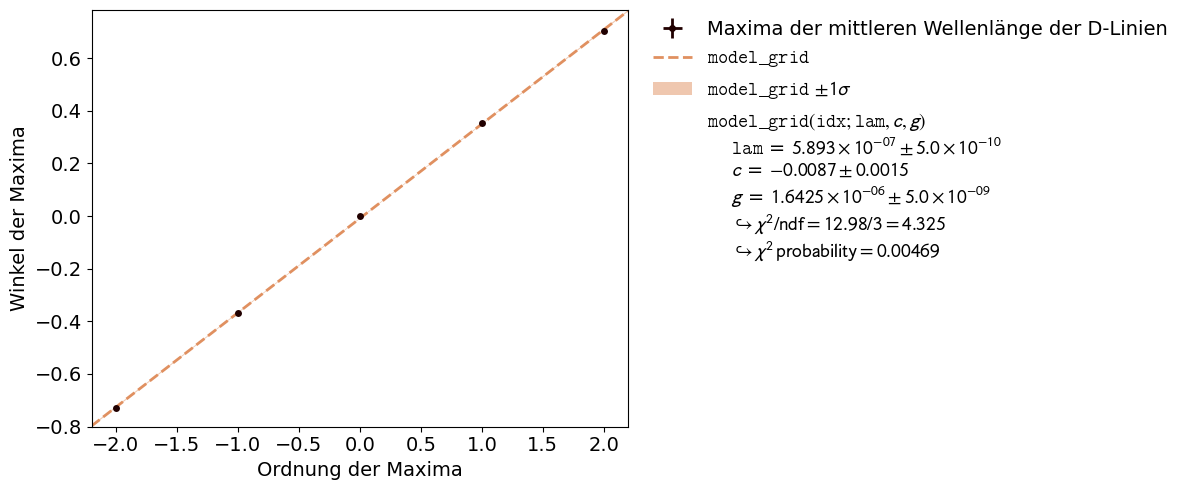

die Gitterkonstante des des Gitters beträgt g = 1/(608.8+/-1.9) 1/mm


In [6]:
# Messungen: Maximum 1. un 2. Od. jeweils für die mittlere Wellenlänge in Grad
na_mid_g1 = unp.uarray([313+9/60-360, 338.5-13/60-360, 0, 20.5+12/60, 44.5+8/60], [0.2/60])
idx = np.array([-2,-1,0,1,2])

# Definition eines Modells
def model_grid(idx,lam,c=0,g=1/600000):
    return idx * lam / g + c

# Definition der Daten für den Fit
xy_data = kafe2.XYContainer(idx,np.sin(np.radians(unp.nominal_values(na_mid_g1))))
xy_data.label = 'Maxima der mittleren Wellenlänge der D-Linien'
xy_data.axis_labels = ('Ordnung der Maxima','Winkel der Maxima')

# Durchführen des Fits
fit_g1 = kafe2.XYFit(xy_data, model_grid)
fit_g1.add_error('y',err_val=unp.std_devs(na_mid_g1))

fit_g1.add_parameter_constraint(name='lam', value=589.3*10**-9, uncertainty=0.5*10**-9)
fit_g1.do_fit()

# Plotten des Fits
plot = kafe2.Plot(fit_g1)
plot.plot()
plot.show()

# Umrecehnung von g
g_1 = ufloat(fit_g1.parameter_values[2], fit_g1.parameter_errors[2])
g_inv = 1 / (g_1 * 1000)
print(f'die Gitterkonstante des des Gitters beträgt g = 1/({g_inv}) 1/mm')

In dieser Teilaifgabe wird die Gitterkonstante eines optischen Gitters mithilfe des oben kalibrierten Spektrometers gemessen. Hierfür wird der Spalt mit Licht einer Na-Dampflampe beleuchtet. Der Spalt ist hierbei so weit geöffnet, dass die Doppellinie zu einer Linie verschwimmt, was dafür sorgt, dass die Maxima zweiter Ordnung gut beobachtbar sind. Somit wird auhc die Unsicherheit der Wellenlänge $\Delta\lambda = \pm 0.5nm$ mit Hilfe des Wellenlängenabstandes der Vorbereitung festgelegt. 

Zur eigentlichen Bestimmung von g wird $sin(\alpha)$ der Maxima gegenüber der Ordnung des Maximums aufgetragen und das Modell $sin(\alpha) = m \cdot \frac{\lambda}{g} + C$ eingepasst. 

Die Anpassung selbst liegt in einem akzeptablen Bereich mit $\chi^2 = 0.692$, wobei für die Unsicherheit des Winkels $0.2$ Minuten gewählt wurden. 
Somit beträgt das erhaltene Ergebnis:

$$g = \frac{1}{608.8 \pm 1.9} \frac{1}{mm}$$

---

### Aufgabe 2.3 Vermessung der $\mathrm{Na}$-D-Doppellinie

 * Bestimmen Sie den Wellenlängenabstand der [$\mathrm{Na}$-D-Doppellinie](https://de.wikipedia.org/wiki/Natrium-D-Linie).
 * Verwenden Sie hierzu das Gitter von **Aufgabe 2.2** und die Feineinstellung der Winkelskala am Spektrometer. Beachten Sie, dass diese Skala zuvor geeicht werden muss.

---

In [7]:
# Wellenlängenabstand (2.3): Gemessen werden Winkel, unter denen beide Linien der Na-D-Doppellinie erscheinen, für das 2. Maximum rechts und links
# erster Eintrag die kürzere Wellenlänge / kleinerer Winkel, zweiter längere Wellenlänge
na_doppellinie_2_3 = unp.uarray([ [44.5 + 7/60 , 44.5 + 11/60] , [ 313.0 + 12/60 - 360 , 313.0 + 7/60 - 360 ] ], [0.1])

### Aufgabe 2.4 Bestimmung der Gitterkonstanten $g'$ eines zweiten Gitters

 * Bestimmen Sie die Gitterkonstante $g'$ eines zweiten Gitters mit ${\approx}140$ Strichen pro $\mathrm{mm}$.
 * Beachten Sie die Hinweise zu dieser Teilaufgabe in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Interferenz/doc/Hinweise-Versuchsdurchfuehrung.md) und beantworten Sie in Ihrer Auswertung die folgenden Fragen: 
    1. Das Gitter kann bis bis zu 6. Ordnung mit monoton abnehmender Intensität in jeder Ordnung beobachtet werden. Was lässt sich aus dieser Beobachtung über $b$ schlussfolgern?
    2. Von welcher Ordnung ab ist die $\mathrm{Na}$-D-Linie getrennt beobachtbar?
    3. Ist Ihre Beobachtung konsistent mit dem erwarteten Auflösungsvermögen?

---

Von der 2. beobachtbar

In [8]:
# Gemessen Winkel nur der D-Linien, wieder die Mitte, bis zur 3. Ordnung, jeweils rechts und links der Mitte
g2_links = unp.uarray([ 5.0 + 23/60 , 10.5 + 26/60 , 16.5 + 8/60], [0.1])
g2_rechts = unp.uarray([ 344.0 + 22/60 - 360 , 348.5 + 19/60 - 360 , 343.0 + 9/60 - 360], [0.1])

### Aufgabe 2.5: Linienspektrum der $\mathrm{Zn}$-Spektrallampe

 * Bestimmen Sie die Wellenlängen der vier deutlich erkennbaren Linien der $\mathrm{Zn}$-Spektrallampe. Die Farben sind violettblau, blau, blaugrün und rot. 
 * Begründen und dokumentieren Sie Ihre Wahl der Mittel und der Methode in Ihrer Auswertung.

---

In [9]:
# von violettblau nach rot, absteigende Wellenlänge
zn_links = unp.uarray([ 16.0 + 20/60 , 16.5 + 28/60 , 16.5 + 18/60 , 22.5 + 0/60 ])
zn_rechts = unp.uarray([ 343.0 + 21/60 - 360 , 343.0 + 15/60 - 360 , 342.5 + 23/60 - 360 , 337.0 + 7/60 - 360 ])

C:\Users\probz\AppData\Local\Temp\ipykernel_2544\3923104199.py:2: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  zn_links = unp.uarray([ 16.0 + 20/60 , 16.5 + 28/60 , 16.5 + 18/60 , 22.5 + 0/60 ])


ValueError: too many values to unpack (expected 2)